In [154]:
import pandas as pd
import glob
import openpyxl

import matplotlib.pyplot as plt
import numpy as np

In [155]:
def readCsvDf(dir, fileName=None):
    try: 
        if dir.endswith('.csv'):
            filesValidation = glob.glob(dir, recursive=False)
            df = pd.read_csv(filesValidation[0])

            return {
                'ok': True,
                'data': df, 
                'msg': f'The DataFrame extraction was successful'
            }

        elif fileName is None:
            filesValidation = glob.glob(f'{dir}/*', recursive=False)
            df = pd.read_csv(filesValidation[0])

            return {
                'ok': True,
                'data': df, 
                'msg': f'The file name was not provided, so the chosen dataset is {filesValidation[0]}'
            }

        fileValidation = glob.glob(f'{dir}/{fileName}', recursive=False)
        df = pd.read_csv(fileValidation[0])
        return {
            'ok': True,
            'data': df, 
            'msg': 'The DataFrame extraction was successful'
        }
    
    except Exception as e:
        return {
            'ok': False, 
            'data': None,
            'msg': f'There is no CSV file named {fileName}'
        }

In [159]:
readCsvRes = readCsvDf('data', 'retail_data.csv')

df = readCsvRes['data'].copy()

dfDescription = df.describe(include = 'all')

dfDescription.to_excel('data/tables/describeDf.xlsx', sheet_name='si', engine= 'openpyxl')


In [160]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format = "%Y-%m-%d")

In [165]:
valuesAmount = df['amount'].value_counts(dropna = False).reset_index()
valuesAmount.columns = ['Amount', 'Count']
valuesAmount.sort_values(by=['Count'])

valuesCostumerID = df['customer_id'].value_counts(dropna = False).reset_index()
valuesCostumerID.columns = ['Customer_id', 'Count']
valuesCostumerID.sort_values(by=['Count'])

valuesID = df['id'].value_counts(dropna = False).reset_index()
valuesID.columns = ['ID', 'Count']
valuesID.sort_values(by=['Count'])

valuesProductsCategory = df['product_category'].value_counts(dropna = False).reset_index()
valuesProductsCategory.columns = ['Product_category', 'Count']
valuesProductsCategory.sort_values(by=['Count'])

valuesPurchaseDate = df['purchase_date'].value_counts(dropna = False).reset_index()
valuesPurchaseDate.columns = ['Purchase_date', 'Count']
valuesPurchaseDate.sort_values(by=['Count'])

,Purchase_date,Count
239,2025-08-23,1
216,2025-02-14,1
218,2025-05-20,1
217,2025-07-24,1
220,2025-07-10,1
...,...,...
7,2025-02-28,7
1,2025-02-08,8
2,2025-06-06,8
3,2025-01-12,8


In [166]:
valuesAmount
valuesID
valuesProductsCategory
valuesPurchaseDate
valuesCostumerID

,Customer_id,Count
0,1058,16
1,1060,16
2,1078,16
3,1028,15
4,1061,14
...,...,...
95,1094,4
96,1030,3
97,1071,3
98,1069,3


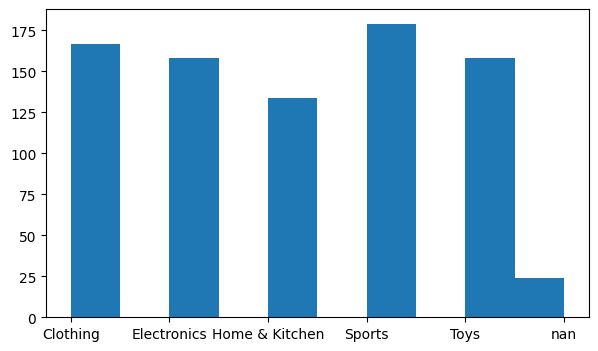

In [167]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(df['product_category'].astype(str))
plt.show()


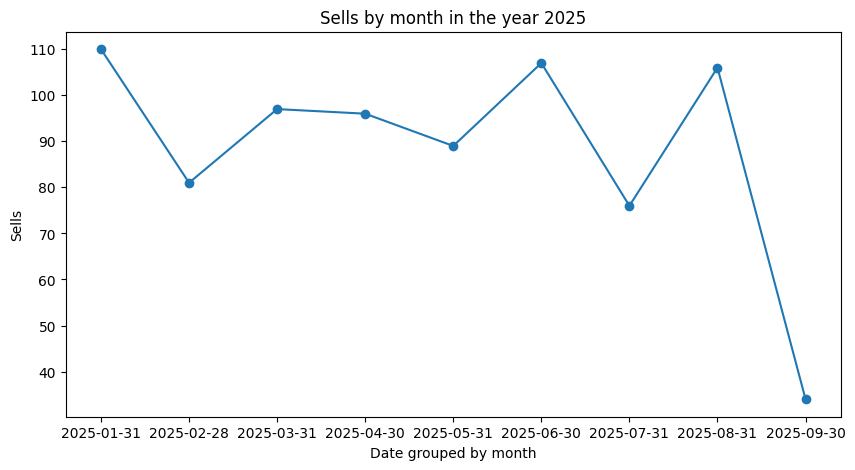

In [168]:
dateGroupedMonth = valuesPurchaseDate.groupby(pd.Grouper(key='Purchase_date', freq='ME')).sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(dateGroupedMonth['Purchase_date'].astype(str), dateGroupedMonth['Count'])
ax.plot(dateGroupedMonth['Purchase_date'].astype(str), dateGroupedMonth['Count'])
ax.set_ylabel('Sells')
ax.set_xlabel('Date grouped by month')
ax.set_title('Sells by month in the year 2025')
plt.show()
